<H1> Asim Hameed Khan </H1>
<H1> CMS ID : 317604 </H1>
<H1> Code: Skip List (Goal 1) </H1>
<H2> Graphs, summary of finding and search costs are at the end of this document </H2>

In [1]:
import random
import csv
import matplotlib.pyplot as plt
import numpy as np

MAX_LEVEL = 9
log_title = [None]*(MAX_LEVEL+1)
log_data = [0]*(MAX_LEVEL+1)
searchSteps = []
calculatedSearchCost = []
#print(len(log_data))
#print(log_data)

class Node(object):
    
    def __init__(self, key, level): 
        self.key = key 

        # list to hold references to node of different level 
        self.next = [None]*(level+1)

In [2]:
def prepareFileLabels(filename):
    # opening the file with w+ mode truncates the file
    f = open(filename, "w+", newline='')
    f.close()

    for i in range(len(log_data)):
        log_title[i]="L"+str(i)

    csvFile = open(filename, 'a', newline='')
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(log_title)
    csvFile.close()


In [3]:
class SkipList(object): 
    ''' 
    Class for Skip list 
    '''
    def __init__(self, max_level,P): 
        #set max levels 
        self.max_level = max_level 

        # P is 1/2 i.e.coin flip probability of nodes
        self.P = P 

        # create head node in the list 
        self.header = self.createNode(self.max_level, 0) 

        # tells current level of skip list 
        self.level = 0

    # creating new node 
    def createNode(self, level, key): 
        n = Node(key, level) 
        return n 

    # generates random level for node 
    def generateRandomLevel(self): 
        level = 0
        a = random.random()
        #increment level till random is less than threshold and max levels
        while a <self.P and level<self.max_level:
            level += 1
            a = random.random()
        return level
    #log
    def keepCount(self,iteration):
        #prepare file name
        fileName = "log_data_"+str(iteration)+".csv"
        
        head = self.header
        #for each level count keys and write in file
        for i in range(self.level, -1, -1):
            #empty previous count
            log_data[i]=0
            current = head.next[i] 
            while(current != None):
                log_data[i]+=1
                current = current.next[i]
            csvFile = open(fileName, 'a', newline='')
            csvWriter = csv.writer(csvFile)
            csvWriter.writerow(log_data)
            csvFile.close()

    # insert given key in skip list 
    def insert(self, key,iteration): 
        # create update array and initialize it 
        update = [None]*(self.max_level+1)
        current = self.header 

         
        #starting from express list, keep moving forward while key is larger than next node's keys
        #if not greater then keep in update list and move 1 level downwards
        
        #from for traverse list in reverse order i.e. 5,4,3,2,1,0 for levels
        for i in range(self.level, -1, -1): 
            
            while current.next[i] and current.next[i].key < key: 
                current = current.next[i]
            update[i] = current 

        #At level 0, now refer to next in list
        current = current.next[0] 

        #if null then then it means we have reached to end node
        #if not eq to current,key then insert it between update[level] and node
        
        if current == None or current.key != key: 
            # get a random level from generator 
            randlevel = self.generateRandomLevel() 

            #generated random level islarger than self.level then refer header for future use
            if randlevel > self.level: 
                for i in range(self.level+1, randlevel+1): 
                    update[i] = self.header 
                self.level = randlevel

            #makes new node in random level
            n = self.createNode(randlevel, key) 

            # insert node here 
            for i in range(randlevel+1):
                n.next[i] = update[i].next[i] 
                update[i].next[i] = n 

            #print("Successfully inserted the key = "+ str(key)) 
            #maintain log after each insertion
            self.keepCount(iteration)
            

    def displaySkipList(self): 
        print("Displaying --> Skip List") 
        head = self.header 
        #traverse in each level until last node has no ref
        for i in range(self.level+1): 
            print("Level {}: ".format(i), end=" ") 
            node = head.next[i] 
            while(node != None): 
                print(node.key,end =" ") 
                node = node.next[i] 
            print("")
            
    def search(self, key):
        
        #counter to estimate search cost
        numOfSteps = 0
        print(str(key)+": Searching Hops: ", end ='-->')
        current = self.header
        for i in range(self.level, -1, -1):
            #keep moving forward in ist till current's next node has less key than searching key
            while(current.next[i] and current.next[i].key < key):
                current = current.next[i]
                print(str(current.key), end ='-->')
                numOfSteps +=1
  
        #made it to 0th level, traverse right in list
        current = current.next[0]
        #print(str(current.key), end ='End of Hops ')
        numOfSteps +=1
        #if current = goat or not print end list 
        if current and current.key == key:
            print(str(current.key), end ='End of Hops ')
            print(" *****Key " + str(key) + " found in steps = " + str(numOfSteps) )
        else:
            print(" ", end ='End of Hops ')
            print(" *****Key " + str(key) + " Not found in steps = "+ str(numOfSteps) )
        
        searchSteps.append(numOfSteps)

In [4]:
#Plots last state counts only
def plotMyLevels(iteration):
    level_data = list(range(0, MAX_LEVEL+1))
    #print(level_data)
    #print(log_data)

    y_pos = np.arange(len(level_data))
    plt.bar(y_pos, log_data, color = (0.5,0.1,0.5,0.6))
    # Add title and axis names
    plt.title('SKIP LIST --> Iteration no. '+ str(iteration))
    plt.xlabel('Level')
    plt.ylabel('Count of Elements in Each Level')
    # Limits for the Y axis
    plt.ylim(0,1200)
    # Create names
    #plt.xticks(y_pos, log_data)
    plt.xticks(y_pos)
    # Show graphic
    plt.show()
    

In [5]:
#Main Function
def Main(iteration):
    print("<----Iteration: " + str(iteration) + "---->")
    #prepare SkipList and others
    mySkipList = SkipList(MAX_LEVEL, 0.5)
    myListofElements = random.sample(range(1, 10000), 1024)
    searchingElements = random.sample(range(1, 10000), 512)

    #insert all elements in skiplist
    for i in range(len(myListofElements)):
        mySkipList.insert(myListofElements[i],iteration)
    print("SkipList insertion completed")
    
    #display inserted keys for one iteration
    mySkipList.displaySkipList()
    print("Printing Logged data i.e. number of elements in each level")
    print(log_data) #number of counts handler
    
    #search in skip list and estimate search time steps
    for i in range(len(searchingElements)):
        mySkipList.search(searchingElements[i])
    
    #print("Search Steps: "searchSteps)
    print("-----")
    print("length of search steps = "+ str(len(searchSteps)))
    
    sumOfAll = sum(searchSteps) #total steps
    #print("Average: "+ str(avg))
    avg = sumOfAll/512 #avg steps check if it is equal to log2(N)
    print("Average search time: " + str(avg))
    calculatedSearchCost.append(avg)
    #plotMyLevels(iteration)

#Run Everything    
for i in range(3):
    #empty log in start
    log_data = [0]*(MAX_LEVEL+1)
    
    #empty for next iteration
    searchSteps = []
    #prepare title i.e. L0,L1...Ln
    fileName = "log_data_"+str(i)+".csv"
    prepareFileLabels(fileName) # i.e. L0 columns, L1...
    Main(i)


<----Iteration: 0---->
SkipList insertion completed
Displaying --> Skip List
Level 0:  56 62 71 80 130 137 155 169 180 191 192 194 196 198 202 211 212 223 228 231 237 243 249 268 286 319 330 347 359 364 365 370 372 374 381 382 384 392 402 416 423 428 430 442 444 454 461 463 507 511 512 516 517 530 538 542 543 564 568 585 594 608 618 651 658 660 668 669 707 708 710 711 720 737 739 763 768 774 790 791 796 803 815 819 822 833 847 853 859 870 888 893 937 938 942 947 955 977 993 1005 1024 1031 1037 1052 1054 1082 1107 1128 1148 1149 1153 1165 1177 1212 1222 1226 1234 1237 1241 1244 1248 1252 1280 1281 1282 1286 1293 1297 1306 1310 1311 1318 1331 1363 1400 1404 1421 1445 1451 1454 1457 1466 1488 1496 1514 1523 1524 1526 1530 1531 1538 1547 1548 1551 1557 1570 1597 1607 1629 1635 1640 1645 1656 1665 1668 1676 1678 1679 1696 1709 1710 1714 1718 1733 1739 1754 1755 1767 1785 1821 1824 1865 1871 1892 1893 1895 1896 1904 1913 1919 1943 1956 1967 1986 1993 2009 2037 2040 2042 2043 2069 2072 2073 2

Level 4:  137 211 237 372 511 538 796 819 847 1054 1148 1293 1310 1466 1514 1570 1635 2040 2154 2156 2445 2544 3198 3269 3353 3396 3518 3624 3761 4078 4221 4415 4478 4555 4593 5325 5569 5765 5798 5877 6043 6166 6372 6683 7008 7031 7146 7339 7416 7623 7667 8008 8236 8269 8300 8502 8543 8596 8660 8676 8826 8985 9013 9193 9238 9249 9255 9278 9309 9525 9647 9670 9686 9809 9872 
Level 5:  237 538 847 1148 1293 1310 1466 1514 1635 2040 2156 2445 2544 3269 3353 3761 4415 4478 5325 5765 6166 6372 7146 7339 7623 8008 8300 8596 8660 8985 9013 9249 9278 9309 9647 9670 
Level 6:  237 538 847 1148 1310 2040 2156 2445 3761 4478 6166 7146 7339 8300 8596 9013 9278 9647 9670 
Level 7:  237 847 1310 2040 2156 3761 9278 
Level 8:  237 847 2040 2156 9278 
Level 9:  2040 9278 
Printing Logged data i.e. number of elements in each level
[1024, 527, 253, 136, 75, 36, 19, 7, 5, 2]
750: Searching Hops: -->237-->538-->660-->708-->710-->711-->720-->737-->739--> End of Hops  *****Key 750 Not found in steps = 10
33

8390: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->8300-->8364-->8371-->8376-->8382--> End of Hops  *****Key 8390 Not found in steps = 13
2382: Searching Hops: -->2040-->2156-->2163-->2319-->2321-->2326-->2330-->2368-->2378-->2381--> End of Hops  *****Key 2382 Not found in steps = 11
9392: Searching Hops: -->2040-->9278-->9309-->9322-->9382-->9388--> End of Hops  *****Key 9392 Not found in steps = 7
2545: Searching Hops: -->2040-->2156-->2445-->2544--> End of Hops  *****Key 2545 Not found in steps = 5
1172: Searching Hops: -->237-->847-->1148-->1153-->1165--> End of Hops  *****Key 1172 Not found in steps = 6
2711: Searching Hops: -->2040-->2156-->2445-->2544-->2550-->2612-->2637-->2704--> End of Hops  *****Key 2711 Not found in steps = 9
5895: Searching Hops: -->2040-->2156-->3761-->4478-->5325-->5765-->5798-->5877-->5893--> End of Hops  *****Key 5895 Not found in steps = 10
937: Searching Hops: -->237-->847-->859-->870-->888-->893-->937End of Hops  *****Key 937 

5130: Searching Hops: -->2040-->2156-->3761-->4478-->4555-->4593-->4611-->4662-->5109-->5111-->5113-->5118--> End of Hops  *****Key 5130 Not found in steps = 13
289: Searching Hops: -->237-->286--> End of Hops  *****Key 289 Not found in steps = 3
9569: Searching Hops: -->2040-->9278-->9309-->9525-->9546-->9550-->9552-->9557-->9558--> End of Hops  *****Key 9569 Not found in steps = 10
2667: Searching Hops: -->2040-->2156-->2445-->2544-->2550-->2612-->2637-->2655-->2666--> End of Hops  *****Key 2667 Not found in steps = 10
4725: Searching Hops: -->2040-->2156-->3761-->4478-->4555-->4593-->4611-->4662-->4664-->4668-->4669-->4671-->4674-->4683--> End of Hops  *****Key 4725 Not found in steps = 15
2625: Searching Hops: -->2040-->2156-->2445-->2544-->2550-->2612-->2624--> End of Hops  *****Key 2625 Not found in steps = 8
1438: Searching Hops: -->237-->847-->1310-->1311-->1421--> End of Hops  *****Key 1438 Not found in steps = 6
6295: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->6219

7385: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7340-->7347-->7352-->7373--> End of Hops  *****Key 7385 Not found in steps = 12
6786: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->6372-->6683-->6698-->6757-->6775-->6781-->6786End of Hops  *****Key 6786 found in steps = 12
5891: Searching Hops: -->2040-->2156-->3761-->4478-->5325-->5765-->5798-->5877-->5881-->5886--> End of Hops  *****Key 5891 Not found in steps = 11
9939: Searching Hops: -->2040-->9278-->9647-->9670-->9686-->9809-->9872-->9931--> End of Hops  *****Key 9939 Not found in steps = 9
1380: Searching Hops: -->237-->847-->1310-->1311-->1318-->1331-->1363--> End of Hops  *****Key 1380 Not found in steps = 8
3816: Searching Hops: -->2040-->2156-->3761-->3773-->3790-->3794-->3796-->3811--> End of Hops  *****Key 3816 Not found in steps = 9
6179: Searching Hops: -->2040-->2156-->3761-->4478-->6166--> End of Hops  *****Key 6179 Not found in steps = 6
9631: Searching Hops: -->2040-->9278-->9309-->95

7043: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->6372-->6683-->7008-->7031--> End of Hops  *****Key 7043 Not found in steps = 10
1014: Searching Hops: -->237-->847-->859-->937-->955-->977-->993-->1005--> End of Hops  *****Key 1014 Not found in steps = 9
7939: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7623-->7667-->7774-->7863-->7908-->7936--> End of Hops  *****Key 7939 Not found in steps = 14
8292: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7623-->8008-->8236-->8269-->8276-->8279-->8287-->8291--> End of Hops  *****Key 8292 Not found in steps = 16
8008: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7623-->7667-->7774-->7863-->7950-->7975-->8000-->8006-->8008End of Hops  *****Key 8008 found in steps = 16
6733: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->6372-->6683-->6698-->6726--> End of Hops  *****Key 6733 Not found in steps = 10
3820: Searching Hops: -->2040-->2156-->3761-->3773-->3790-->3794

8780: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->8300-->8596-->8660-->8676-->8716-->8748--> End of Hops  *****Key 8780 Not found in steps = 14
1863: Searching Hops: -->237-->847-->1310-->1466-->1514-->1635-->1679-->1710-->1714-->1755-->1767-->1785-->1821-->1824--> End of Hops  *****Key 1863 Not found in steps = 15
9292: Searching Hops: -->2040-->9278-->9290--> End of Hops  *****Key 9292 Not found in steps = 4
1901: Searching Hops: -->237-->847-->1310-->1466-->1514-->1635-->1679-->1710-->1714-->1755-->1865-->1871-->1892-->1893-->1895-->1896--> End of Hops  *****Key 1901 Not found in steps = 17
4187: Searching Hops: -->2040-->2156-->3761-->4078-->4183-->4185--> End of Hops  *****Key 4187 Not found in steps = 7
417: Searching Hops: -->237-->372-->382-->402-->416--> End of Hops  *****Key 417 Not found in steps = 6
8033: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7623-->8008-->8023-->8025--> End of Hops  *****Key 8033 Not found in steps = 12

3871: Searching Hops: -->2040-->2156-->3761-->3773-->3831-->3839-->3867-->3870--> End of Hops  *****Key 3871 Not found in steps = 9
140: Searching Hops: -->137--> End of Hops  *****Key 140 Not found in steps = 2
9524: Searching Hops: -->2040-->9278-->9309-->9322-->9474-->9479-->9505-->9512--> End of Hops  *****Key 9524 Not found in steps = 9
9628: Searching Hops: -->2040-->9278-->9309-->9525-->9606--> End of Hops  *****Key 9628 Not found in steps = 6
4646: Searching Hops: -->2040-->2156-->3761-->4478-->4555-->4593-->4611-->4646End of Hops  *****Key 4646 found in steps = 8
2585: Searching Hops: -->2040-->2156-->2445-->2544-->2550-->2566--> End of Hops  *****Key 2585 Not found in steps = 7
2405: Searching Hops: -->2040-->2156-->2163-->2319-->2321-->2326-->2330-->2368-->2378-->2384-->2404--> End of Hops  *****Key 2405 Not found in steps = 12
7968: Searching Hops: -->2040-->2156-->3761-->4478-->6166-->7146-->7339-->7623-->7667-->7774-->7863-->7950-->7967--> End of Hops  *****Key 7968 Not f

Level 2:  14 18 49 57 83 185 206 222 232 298 304 374 376 393 427 454 466 475 481 495 567 575 636 683 718 739 810 822 846 865 924 969 1002 1028 1112 1123 1149 1182 1197 1277 1318 1369 1410 1490 1673 1695 1717 1718 1766 1768 1770 1784 1795 1919 1986 2169 2248 2251 2254 2375 2424 2498 2524 2614 2661 2676 2708 2794 2835 2861 2968 3107 3254 3438 3503 3516 3608 3628 3653 3730 3741 3756 3799 3807 3815 3823 3924 4000 4079 4150 4159 4232 4260 4263 4278 4298 4328 4354 4356 4413 4442 4479 4509 4558 4618 4643 4669 4674 4749 4778 4797 4819 4834 4836 4859 4910 4912 4966 5004 5033 5072 5121 5350 5446 5511 5530 5562 5688 5706 5880 6013 6115 6146 6201 6262 6317 6328 6383 6406 6415 6429 6436 6451 6503 6532 6556 6559 6800 6804 6817 6843 6881 6942 6960 6971 6992 7184 7192 7204 7207 7248 7266 7330 7361 7460 7510 7616 7696 7703 7770 7825 7853 7868 7881 7884 7892 7939 7947 7953 8044 8080 8093 8113 8125 8126 8143 8283 8332 8367 8370 8441 8511 8541 8585 8602 8603 8625 8660 8664 8668 8674 8710 8711 8781 8786 88

2502: Searching Hops: -->718-->2169-->2424-->2498--> End of Hops  *****Key 2502 Not found in steps = 5
9802: Searching Hops: -->718-->3503-->4260-->6817-->8541-->9339-->9796--> End of Hops  *****Key 9802 Not found in steps = 8
6405: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->6201-->6383-->6389--> End of Hops  *****Key 6405 Not found in steps = 12
6954: Searching Hops: -->718-->3503-->4260-->6817-->6843-->6881-->6942--> End of Hops  *****Key 6954 Not found in steps = 8
2601: Searching Hops: -->718-->2169-->2424-->2498-->2524-->2535-->2590--> End of Hops  *****Key 2601 Not found in steps = 8
7463: Searching Hops: -->718-->3503-->4260-->6817-->6843-->7266-->7330-->7361-->7460--> End of Hops  *****Key 7463 Not found in steps = 10
4499: Searching Hops: -->718-->3503-->4260-->4354-->4413-->4442-->4479-->4495--> End of Hops  *****Key 4499 Not found in steps = 9
7028: Searching Hops: -->718-->3503-->4260-->6817-->6843-->6881-->6971-->6992-->6993-->7015--> End of 

4186: Searching Hops: -->718-->3503-->4150-->4159-->4164-->4175-->4177--> End of Hops  *****Key 4186 Not found in steps = 8
43: Searching Hops: -->14-->18-->37-->38-->40--> End of Hops  *****Key 43 Not found in steps = 6
1503: Searching Hops: -->718-->822-->1318-->1410-->1490--> End of Hops  *****Key 1503 Not found in steps = 6
1655: Searching Hops: -->718-->822-->1318-->1410-->1490-->1517-->1520-->1547-->1558-->1573-->1576-->1587-->1588-->1609-->1619-->1629-->1632--> End of Hops  *****Key 1655 Not found in steps = 18
4766: Searching Hops: -->718-->3503-->4260-->4354-->4413-->4558-->4643-->4669-->4749-->4762-->4764--> End of Hops  *****Key 4766 Not found in steps = 12
3023: Searching Hops: -->718-->2169-->2424-->2835-->2968-->2982-->3010-->3015--> End of Hops  *****Key 3023 Not found in steps = 9
7034: Searching Hops: -->718-->3503-->4260-->6817-->6843-->6881-->6971-->6992-->6993-->7015--> End of Hops  *****Key 7034 Not found in steps = 11
8386: Searching Hops: -->718-->3503-->4260-->6

6672: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->6406-->6556-->6559-->6571-->6594-->6599-->6649--> End of Hops  *****Key 6672 Not found in steps = 14
2023: Searching Hops: -->718-->822-->1318-->1766-->1795-->1986-->2011-->2012--> End of Hops  *****Key 2023 Not found in steps = 9
1540: Searching Hops: -->718-->822-->1318-->1410-->1490-->1517-->1520-->1522--> End of Hops  *****Key 1540 Not found in steps = 9
6313: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->6201-->6262-->6263-->6296-->6307--> End of Hops  *****Key 6313 Not found in steps = 14
9852: Searching Hops: -->718-->3503-->4260-->6817-->8541-->9339-->9796-->9804-->9825-->9828-->9831--> End of Hops  *****Key 9852 Not found in steps = 12
6353: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->6201-->6317-->6328-->6332--> End of Hops  *****Key 6353 Not found in steps = 13
1803: Searching Hops: -->718-->822-->1318-->1766-->1795-->1796--> End of Hops  *****Key 1803 

7672: Searching Hops: -->718-->3503-->4260-->6817-->6843-->7266-->7330-->7361-->7460-->7510-->7616-->7626-->7631-->7638-->7642-->7652--> End of Hops  *****Key 7672 Not found in steps = 17
6972: Searching Hops: -->718-->3503-->4260-->6817-->6843-->6881-->6971--> End of Hops  *****Key 6972 Not found in steps = 8
881: Searching Hops: -->718-->822-->846-->865-->880--> End of Hops  *****Key 881 Not found in steps = 6
6081: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->6013-->6020-->6042-->6054-->6070-->6076--> End of Hops  *****Key 6081 Not found in steps = 15
1482: Searching Hops: -->718-->822-->1318-->1410-->1411-->1424-->1436-->1446--> End of Hops  *****Key 1482 Not found in steps = 9
8496: Searching Hops: -->718-->3503-->4260-->6817-->7696-->7853-->7939-->8370-->8441-->8445-->8452-->8465--> End of Hops  *****Key 8496 Not found in steps = 13
8537: Searching Hops: -->718-->3503-->4260-->6817-->7696-->7853-->7939-->8370-->8441-->8511-->8527-->8536-->8537End of H

3182: Searching Hops: -->718-->2169-->2424-->2835-->2968-->3107-->3120-->3137-->3165--> End of Hops  *****Key 3182 Not found in steps = 10
9152: Searching Hops: -->718-->3503-->4260-->6817-->8541-->8602-->8710-->8781-->8786-->8858-->9087-->9125-->9142--> End of Hops  *****Key 9152 Not found in steps = 14
6069: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->6013-->6020-->6042-->6054--> End of Hops  *****Key 6069 Not found in steps = 13
1904: Searching Hops: -->718-->822-->1318-->1766-->1795-->1849--> End of Hops  *****Key 1904 Not found in steps = 7
2399: Searching Hops: -->718-->2169-->2248-->2251-->2375-->2397--> End of Hops  *****Key 2399 Not found in steps = 7
5939: Searching Hops: -->718-->3503-->4260-->4354-->5072-->5562-->5688-->5880-->5906-->5914--> End of Hops  *****Key 5939 Not found in steps = 11
4899: Searching Hops: -->718-->3503-->4260-->4354-->4413-->4558-->4643-->4669-->4749-->4778-->4797-->4819-->4836-->4859-->4882-->4884-->4895--> End of Hops

Level 1:  13 16 20 47 50 122 126 135 150 166 171 188 198 213 229 233 257 277 318 328 389 393 396 420 430 471 525 549 559 581 646 713 732 744 754 762 763 808 856 880 882 946 957 983 988 990 998 1025 1029 1068 1075 1093 1164 1165 1167 1210 1217 1230 1288 1304 1322 1338 1348 1349 1374 1392 1400 1401 1422 1433 1445 1471 1523 1571 1575 1619 1621 1625 1631 1647 1677 1688 1693 1696 1727 1765 1770 1777 1794 1805 1868 1892 1899 1931 1945 1950 1961 1965 1997 2011 2036 2063 2073 2146 2154 2175 2191 2197 2221 2225 2230 2232 2248 2292 2305 2313 2314 2346 2362 2365 2394 2399 2408 2409 2411 2421 2478 2497 2523 2528 2542 2548 2549 2576 2584 2594 2630 2667 2669 2673 2687 2695 2737 2742 2776 2815 2820 2828 2890 2893 2896 2901 2932 2945 3007 3010 3029 3064 3095 3111 3139 3146 3161 3162 3182 3210 3211 3226 3234 3267 3322 3325 3332 3335 3351 3365 3374 3376 3385 3399 3410 3457 3493 3494 3506 3512 3542 3544 3568 3578 3610 3618 3645 3646 3651 3687 3689 3707 3733 3755 3758 3767 3799 3803 3822 3837 3851 3859 38

278: Searching Hops: -->171-->233-->257-->277--> End of Hops  *****Key 278 Not found in steps = 5
1069: Searching Hops: -->171-->233-->732-->762-->998-->1029-->1068--> End of Hops  *****Key 1069 Not found in steps = 8
98: Searching Hops: -->16-->20-->47-->50-->53-->65-->67-->75-->84--> End of Hops  *****Key 98 Not found in steps = 10
996: Searching Hops: -->171-->233-->732-->762-->763-->856-->990--> End of Hops  *****Key 996 Not found in steps = 8
220: Searching Hops: -->171-->198-->213--> End of Hops  *****Key 220 Not found in steps = 4
9408: Searching Hops: -->171-->1210-->1575-->9261-->9301-->9407--> End of Hops  *****Key 9408 Not found in steps = 7
1588: Searching Hops: -->171-->1210-->1575--> End of Hops  *****Key 1588 Not found in steps = 4
8760: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->8584-->8758--> End of Hops  *****Key 8760 Not found in steps = 12
843: Searching Hops: -->171-->233-->732-->762-->763-->808-->816-->824-->836--> End of Hops

7472: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7363-->7467--> End of Hops  *****Key 7472 Not found in steps = 12
2738: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2478-->2542-->2584-->2669-->2673-->2737--> End of Hops  *****Key 2738 Not found in steps = 12
2559: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2478-->2542-->2548-->2549--> End of Hops  *****Key 2559 Not found in steps = 10
3925: Searching Hops: -->171-->1210-->1575-->2175-->2305-->3493-->3707-->3767-->3919--> End of Hops  *****Key 3925 Not found in steps = 10
3161: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2742-->2820-->2828-->2893-->3111-->3139-->3146-->3149-->3161End of Hops  *****Key 3161 found in steps = 14
3430: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2742-->3365-->3385-->3410--> End of Hops  *****Key 3430 Not found in steps = 10
3645: Searching Hops: -->171-->1210-->1575-->2175-->2305-->3493-->3578-->3618-->3635-->3638-->3643-->3644-->364

6766: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->6274-->6320-->6493-->6650-->6758-->6761--> End of Hops  *****Key 6766 Not found in steps = 14
7482: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7363-->7467--> End of Hops  *****Key 7482 Not found in steps = 12
2867: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2742-->2820-->2828-->2848-->2850-->2859--> End of Hops  *****Key 2867 Not found in steps = 12
6945: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->6274-->6320-->6493-->6650-->6904-->6928-->6939-->6943--> End of Hops  *****Key 6945 Not found in steps = 16
7916: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7492-->7506-->7538-->7614-->7700-->7813-->7825-->7903-->7906--> End of Hops  *****Key 7916 Not found in steps = 19
5192: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5132-->5137--> End of Hops  *****Key 5192 Not found in steps = 8
5222: Searching Hops

6115: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->5981-->6028-->6074-->6083-->6094-->6110--> End of Hops  *****Key 6115 Not found in steps = 14
7713: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7492-->7506-->7538-->7614-->7700-->7702-->7713End of Hops  *****Key 7713 found in steps = 16
6248: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->6219-->6224--> End of Hops  *****Key 6248 Not found in steps = 10
6225: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->6219-->6224--> End of Hops  *****Key 6225 Not found in steps = 10
1823: Searching Hops: -->171-->1210-->1575-->1765-->1770-->1777-->1794-->1805-->1808--> End of Hops  *****Key 1823 Not found in steps = 10
7805: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7492-->7506-->7538-->7614-->7700-->7719-->7776--> End of Hops  *****Key 7805 Not found in steps = 17
9624: Searching Hops: -->171-->1210-->1575-->926

6232: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->6219-->6224--> End of Hops  *****Key 6232 Not found in steps = 10
5345: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5343--> End of Hops  *****Key 5345 Not found in steps = 8
8284: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5979-->7030-->7345-->7492-->7506-->7538-->7614-->7700-->7813-->7825-->7903-->8003-->8050-->8167-->8214-->8276--> End of Hops  *****Key 8284 Not found in steps = 23
5701: Searching Hops: -->171-->1210-->1575-->2175-->5111-->5335-->5424-->5506-->5681-->5684--> End of Hops  *****Key 5701 Not found in steps = 11
4272: Searching Hops: -->171-->1210-->1575-->2175-->2305-->3493-->3929-->4038-->4066-->4230-->4233-->4251-->4256-->4270--> End of Hops  *****Key 4272 Not found in steps = 15
3484: Searching Hops: -->171-->1210-->1575-->2175-->2305-->2742-->3365-->3385-->3410-->3457-->3481--> End of Hops  *****Key 3484 Not found in steps = 12
9829: Searching Hops: -->171-->121

<H1> Goal 2: Search Cost </H1>

In [6]:
for i in range(len(calculatedSearchCost)):
    print("Search Cost of "+ str(i)+ "th iteration is " + str(calculatedSearchCost[i]))

Search Cost of 0th iteration is 10.451171875
Search Cost of 1th iteration is 10.208984375
Search Cost of 2th iteration is 11.955078125


<H1> Goal 1: Plotting graph based on logged </H1>

In [7]:
#Plot based on log files and generate graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint


def prepareAndPlot(iteration):
    #prepare filename
    fileName = "log_data_"+str(iteration)+ ".csv"
    print(fileName)
    my_csv = pd.read_csv(fileName)
    L0 = np.array(my_csv.L0)
    L1 = np.array(my_csv.L1)
    L2 = np.array(my_csv.L2)
    L3 = np.array(my_csv.L3)
    L4 = np.array(my_csv.L4)
    L5 = np.array(my_csv.L5)
    L6 = np.array(my_csv.L6)
    L7 = np.array(my_csv.L7)
    L8 = np.array(my_csv.L8)
    L9 = np.array(my_csv.L9)

    L9DL0 = L9/L0
    L8DL0 = L8/L0
    L7DL0 = L7/L0
    L6DL0 = L6/L0
    L5DL0 = L5/L0
    L4DL0 = L4/L0
    L3DL0 = L3/L0
    L2DL0 = L2/L0
    L1DL0 = L1/L0

    listOfLogs  = [L1DL0,L2DL0,L3DL0,L4DL0,L5DL0,L6DL0,L7DL0,L8DL0,L9DL0]
    #print(listOfLogs[8][0:31])


    #plotting part
    x = np.linspace(0,listOfLogs[0].shape[0],listOfLogs[0].shape[0])

    plt.rcParams["figure.figsize"] = (12,9)

    for i in range(len(listOfLogs)):
        color = '#%06X' % randint(0, 0xFFFFFF)
        plt.plot(x, listOfLogs[i],color=color,marker=',',linewidth=1,label="L"+str(i+1)+"/L0")

    plt.ylim(0,0.75)
    plt.xlabel("Convergence among levels")
    plt.ylabel("Values")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.title("Plotting File --> log_data_"+str(iteration))
    plt.savefig("log_data_"+str(iteration)+ ".png")
    plt.show()

log_data_0.csv


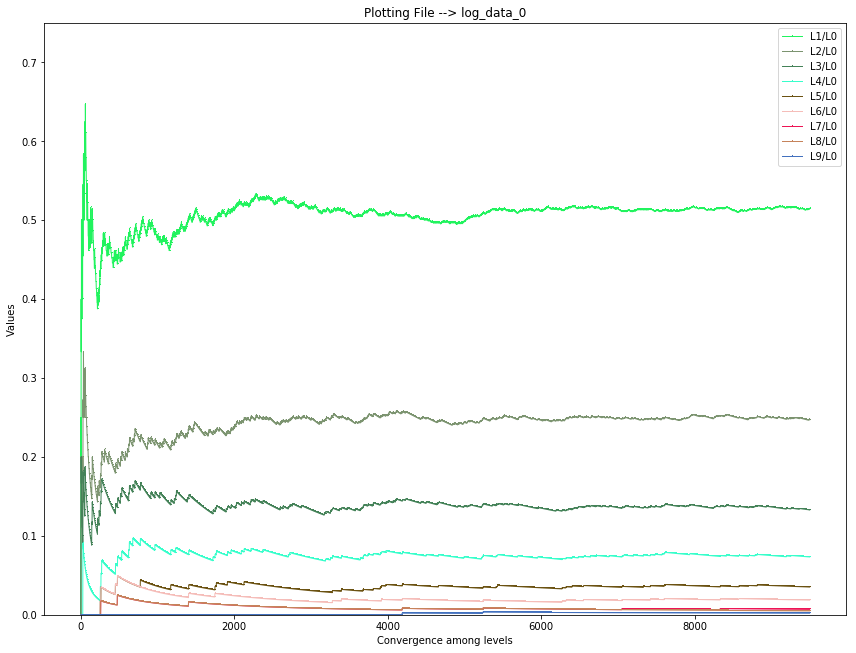

log_data_1.csv


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true

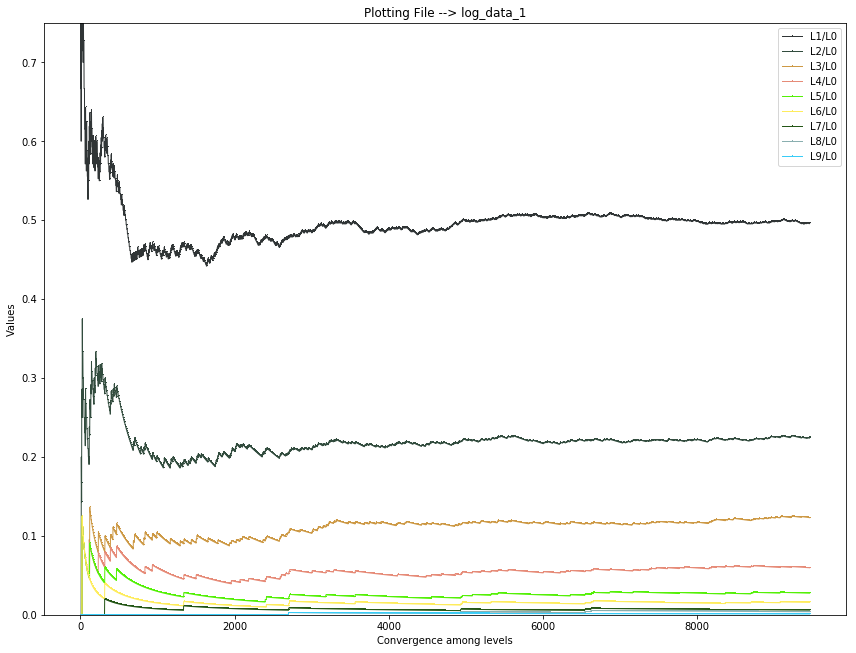

log_data_2.csv


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


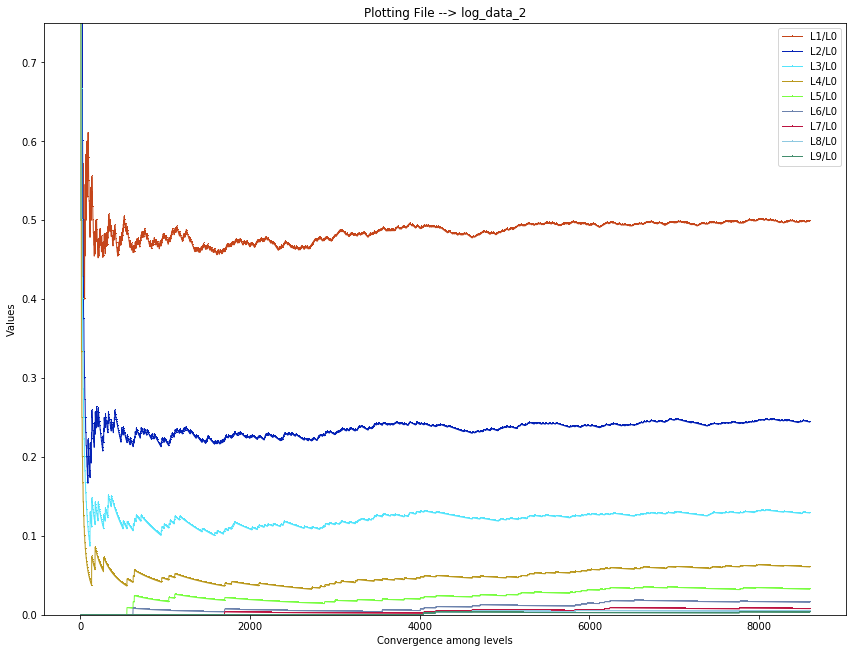

In [8]:
#Main Block runs for 3 files and plots 3 graphs
for i in range(3):
    prepareAndPlot(i)

<H1> Summary of Findings </H1>

The implemented skip list follows a coin-flip strategy. For a coin flip, it is promoted to next level only if the coin comes up heads. In this implementation coin flip is actually a fixed probability p whose value is 0.5. The node keeps getting promoted until it is less than probability p. After inserting each key in the skip list, we kept on counting the elements in each level to observe the distribution of elements when the number of keys is larger.
<br>
The graph was plotted with of L1/L0, L2/L0, …, Ln/L0. In this case, maximum levels are 10 i.e. 0 to 9. It can be seen as each successive insert in the skip list starts to converge, at each level, as the number of insertions starts growing. It is observable in graph that L1/L0 converges around ½ of the elements w.r.t to level 0 (keeping in mind that all insertion will present in bottom level), whereas L2/L0 converges around ¼ and later levels are half of its above i.e. 1,1/2,1/4,1/8 and so on.
<br>
Above paragraph proves the point that each insertion for a probability distribution in the skip list.
